In [18]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import List, Tuple , Dict, TypedDict, Any
import os   
from dotenv import load_dotenv

In [19]:
load_dotenv()

True

In [21]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    
    strike_rate: float
    balls_per_boundary: float
    boundary_percentage: float

In [32]:
def calcuate_strike_rate(state: BatsmanState) :
    sr = (state['runs'] / state['balls'])/100 if state['balls'] > 0 else 0
    state['strike_rate'] = sr
    return {'strike_rate': sr}

In [42]:
def  calculate_balls_per_boundary(state: BatsmanState) :
    bp = state['balls']/(state['fours'] + state['sixes']) if (state['fours'] + state['sixes']) > 0 else 0
    state['balls_per_boundary'] = bp
    return {'balls_per_boundary': bp}

In [44]:
def calculate_boundary_percentage(state: BatsmanState) :
    bp = ((state['fours']*4 + state['sixes']*6) / state['runs'])*100 
    state['boundary_percentage'] = bp
    return  {'boundary_percentage': bp}

In [45]:
def summary(state: BatsmanState) :
    summary  = f""" 
Strike Rate: {state['strike_rate']} \n
Balls per Boundary: {state['balls_per_boundary']} \n
Boundary Percentage: {state['boundary_percentage']} \n  

    """
    state['summary'] = summary
    return {'summary': summary}


In [46]:
graph = StateGraph(BatsmanState)
graph.add_node('calcuate_strike_rate', calcuate_strike_rate)
graph.add_node('calculate_balls_per_boundary', calculate_balls_per_boundary)
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
graph.add_node('summary', summary)

In [47]:
graph.add_edge(START, 'calculate_balls_per_boundary')
graph.add_edge(START, 'calcuate_strike_rate')
graph.add_edge(START, 'calculate_boundary_percentage')

graph.add_edge('calculate_balls_per_boundary', 'summary')
graph.add_edge('calcuate_strike_rate', 'summary')
graph.add_edge('calculate_boundary_percentage', 'summary')

graph.add_edge('summary', END)

In [48]:
workflow = graph.compile()

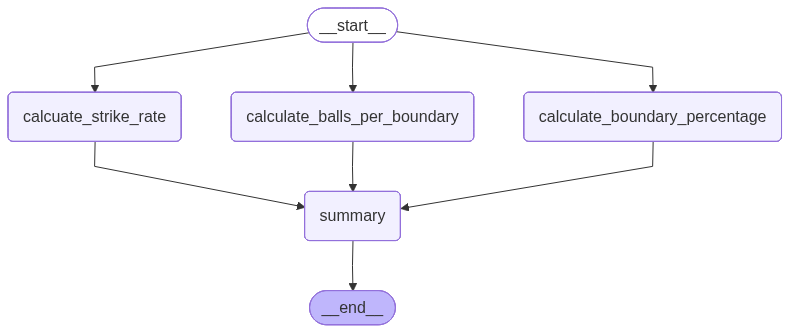

In [49]:
workflow

In [50]:
initial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}
workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'strike_rate': 0.02,
 'balls_per_boundary': 5.0,
 'boundary_percentage': 48.0}